In [28]:
import pandas as pd


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_avg_4df(df1, df2, df3, df4, names, num_xticks=10):
    """
    Plot rata-rata dari 4 DataFrame.
    Sumbu X akan mengikuti nama kolom (harus bisa dikonversi ke angka).
    """
    # Validasi nama
    if len(names) != 4:
        raise ValueError("Parameter 'names' harus berisi 4 nama sesuai jumlah DataFrame.")

    # Pastikan semua DF memiliki kolom yang sama
    common_cols = (
        df1.columns.intersection(df2.columns)
        .intersection(df3.columns)
        .intersection(df4.columns)
    )
    df1, df2, df3, df4 = (
        df1[common_cols],
        df2[common_cols],
        df3[common_cols],
        df4[common_cols],
    )

    # Ubah kolom ke nilai numerik (misalnya 1789.56)
    try:
        x_vals = common_cols.astype(float)
    except Exception:
        raise ValueError("Kolom harus berupa angka (atau dapat dikonversi ke float).")

    # Hitung rata-rata tiap kolom
    avg1 = df1.mean()
    avg2 = df2.mean()
    avg3 = df3.mean()
    avg4 = df4.mean()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, avg1, label=names[0], linewidth=2)
    plt.plot(x_vals, avg2, label=names[1], linewidth=2)
    plt.plot(x_vals, avg3, label=names[2], linewidth=2)
    plt.plot(x_vals, avg4, label=names[3], linewidth=2)

    # Tentukan tick berdasarkan data asli, tapi dibatasi jumlahnya
    tick_positions = np.linspace(x_vals.min(), x_vals.max(), num_xticks)
    tick_positions = np.round(tick_positions).astype(int)  # pastikan bilangan bulat

    plt.xticks(tick_positions, rotation=0)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("reflectance")
    plt.title("")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [31]:
df_basah_fenol = pd.read_csv('../../curated_data_2/nir_basah_fenol_df.csv')
df_basah_gula_reduksi = pd.read_csv('../../curated_data_2/nir_kering_gula_reduksi_df.csv')
df_basah_kadar_air = pd.read_csv('../../curated_data_2/nir_basah_kadar_air_df.csv')
df_basah_lemak = pd.read_csv('../../curated_data_2/nir_basah_lemak_df.csv')
df_basah_protein = pd.read_csv('../../curated_data_2/nir_basah_protein_df.csv')

df_basah=pd.concat([df_basah_fenol,df_basah_gula_reduksi,df_basah_kadar_air, df_basah_lemak, df_basah_protein])
df_basah.drop(columns=['SAMPEL'], inplace=True)
df_basah = df_basah.dropna(axis=1)
df_basah

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,57.65,57.75,57.13,56.87,56.58,56.67,56.59,56.50,57.10,57.15,...,25.95,26.17,26.61,26.63,27.08,27.84,29.46,30.98,32.77,33.90
1,43.89,44.03,43.54,43.32,43.05,43.05,42.86,42.65,43.03,42.91,...,19.68,19.78,20.02,19.87,20.02,20.40,21.45,22.40,23.63,24.46
2,77.56,77.63,76.88,76.64,76.44,76.64,76.63,76.67,77.54,77.80,...,38.33,38.72,39.40,39.72,40.66,42.18,44.72,47.12,49.55,51.01
3,54.55,54.67,54.13,53.94,53.71,53.81,53.73,53.67,54.19,54.24,...,24.76,24.90,25.17,25.06,25.32,25.87,27.16,28.32,29.72,30.63
4,46.60,46.85,46.42,46.22,45.91,45.90,45.63,45.35,45.75,45.57,...,23.13,23.19,23.42,23.21,23.41,23.88,25.16,26.27,27.65,28.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,39.18,39.18,38.82,38.61,38.41,38.37,38.25,38.12,38.27,38.18,...,15.86,15.85,15.88,15.74,15.77,15.92,16.38,16.82,17.44,17.89
185,52.63,52.72,52.20,51.96,51.67,51.68,51.54,51.43,51.88,51.87,...,23.11,23.23,23.47,23.35,23.55,24.01,25.10,26.12,27.36,28.18
186,60.88,60.78,60.33,60.08,59.94,59.99,60.03,60.11,60.48,60.62,...,27.00,27.02,27.03,26.87,26.89,27.10,27.60,28.06,28.68,29.09
187,58.10,58.19,57.70,57.46,57.18,57.17,56.99,56.81,57.16,57.05,...,27.57,27.57,27.70,27.50,27.66,28.10,29.17,30.07,31.07,31.69


In [32]:
df_fermentasi_fenol = pd.read_csv('../../curated_data_2/nir_fermentasi_fenol_df.csv')
df_fermentasi_gula_reduksi = pd.read_csv('../../curated_data_2/nir_kering_gula_reduksi_df.csv')
df_fermentasi_kadar_air = pd.read_csv('../../curated_data_2/nir_fermentasi_kadar_air_df.csv')
df_fermentasi_lemak = pd.read_csv('../../curated_data_2/nir_fermentasi_lemak_df.csv')
df_fermentasi_protein = pd.read_csv('../../curated_data_2/nir_fermentasi_protein_df.csv')

df_fermentasi=pd.concat([df_fermentasi_fenol,df_fermentasi_gula_reduksi,df_fermentasi_kadar_air, df_fermentasi_lemak, df_fermentasi_protein])
df_fermentasi.drop(columns=['SAMPEL'], inplace=True)
df_fermentasi = df_fermentasi.dropna(axis=1)
df_fermentasi

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,46.24,46.58,46.21,46.19,46.10,46.36,46.35,46.32,47.07,47.11,...,20.63,20.84,21.28,21.17,21.35,21.69,22.77,23.74,25.08,25.99
1,40.97,41.15,40.84,40.81,40.76,40.95,40.95,40.95,41.52,41.62,...,19.96,20.13,20.43,20.35,20.42,20.60,21.26,21.86,22.71,23.31
2,51.73,51.59,51.38,51.28,51.28,51.36,51.47,51.66,51.85,52.09,...,25.30,25.38,25.39,25.32,25.14,24.84,24.42,23.98,23.54,23.30
3,46.58,46.53,46.30,46.23,46.22,46.34,46.46,46.61,46.88,47.09,...,19.07,19.09,19.13,19.04,18.95,18.79,18.71,18.57,18.55,18.55
4,41.80,41.94,41.56,41.46,41.35,41.48,41.42,41.37,41.88,41.92,...,19.50,19.64,19.92,19.81,19.83,19.95,20.53,21.06,21.87,22.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,35.89,36.06,35.73,35.67,35.58,35.74,35.71,35.68,36.19,36.24,...,15.90,16.03,16.29,16.19,16.23,16.36,16.95,17.49,18.34,18.95
196,41.25,41.23,41.06,41.03,41.03,41.15,41.26,41.39,41.63,41.81,...,20.21,20.22,20.26,20.18,20.12,20.01,19.96,19.86,19.83,19.81
197,42.72,43.02,42.56,42.47,42.31,42.51,42.44,42.33,43.03,43.01,...,20.45,20.68,21.14,21.05,21.24,21.59,22.74,23.78,25.21,26.20
198,48.95,48.73,48.45,48.31,48.29,48.35,48.49,48.73,48.93,49.22,...,25.03,25.18,25.28,25.37,25.36,25.26,25.05,24.90,24.79,24.75


In [33]:
df_kering_fenol = pd.read_csv('../../curated_data_2/nir_kering_fenol_df.csv')
df_kering_gula_reduksi = pd.read_csv('../../curated_data_2/nir_kering_gula_reduksi_df.csv')
df_kering_kadar_air = pd.read_csv('../../curated_data_2/nir_kering_kadar_air_df.csv')
df_kering_lemak = pd.read_csv('../../curated_data_2/nir_kering_lemak_df.csv')
df_kering_protein = pd.read_csv('../../curated_data_2/nir_kering_protein_df.csv')

df_kering=pd.concat([df_kering_fenol,df_kering_gula_reduksi,df_kering_kadar_air, df_kering_lemak, df_kering_protein])
df_kering.drop(columns=['SAMPEL'], inplace=True)
df_kering = df_kering.dropna(axis=1)
df_kering


,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,26.91,27.08,26.93,26.84,26.69,26.65,26.52,26.34,26.52,26.36,...,14.83,14.74,14.71,14.44,14.29,14.24,14.51,14.73,15.06,15.31
1,31.47,31.60,31.63,31.66,31.63,31.68,31.67,31.65,31.76,31.76,...,14.88,14.85,14.79,14.57,14.35,14.07,13.84,13.52,13.24,13.09
2,24.80,24.94,24.85,24.80,24.69,24.67,24.58,24.46,24.60,24.49,...,13.85,13.82,13.83,13.67,13.58,13.53,13.71,13.86,14.11,14.29
3,27.79,27.94,27.97,28.02,28.00,28.07,28.04,28.03,28.17,28.19,...,14.05,14.01,14.00,13.85,13.72,13.58,13.52,13.43,13.42,13.45
4,38.65,38.79,38.81,38.87,38.87,38.97,38.97,38.98,39.10,39.08,...,20.49,20.31,20.06,19.65,19.27,18.94,18.72,18.40,18.10,17.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,38.61,38.86,38.80,38.79,38.68,38.71,38.63,38.50,38.74,38.61,...,24.06,23.96,23.94,23.68,23.54,23.52,23.88,24.21,24.60,24.85
170,41.67,41.85,41.94,42.04,42.06,42.16,42.18,42.21,42.36,42.40,...,24.35,24.20,24.03,23.69,23.37,23.02,22.71,22.29,21.87,21.61
171,35.29,35.48,35.45,35.44,35.36,35.37,35.32,35.24,35.42,35.34,...,24.19,24.06,23.98,23.69,23.48,23.37,23.48,23.51,23.48,23.45
172,30.37,30.55,30.53,30.54,30.49,30.53,30.50,30.42,30.60,30.53,...,19.60,19.53,19.51,19.31,19.18,19.10,19.22,19.27,19.36,19.44


In [34]:
df_roasting_fenol = pd.read_csv('../../curated_data_2/nir_roasting_fenol_df.csv')
df_roasting_gula_reduksi = pd.read_csv('../../curated_data_2/nir_kering_gula_reduksi_df.csv')
df_roasting_kadar_air = pd.read_csv('../../curated_data_2/nir_roasting_kadar_air_df.csv')
df_roasting_lemak = pd.read_csv('../../curated_data_2/nir_roasting_lemak_df.csv')
df_roasting_protein = pd.read_csv('../../curated_data_2/nir_roasting_protein_df.csv')

df_roasting=pd.concat([df_roasting_fenol,df_roasting_gula_reduksi,df_roasting_kadar_air, df_roasting_lemak, df_roasting_protein])
df_roasting.drop(columns=['SAMPEL'], inplace=True)
df_roasting = df_roasting.dropna(axis=1)
df_roasting

,954.165,960.187,966.207,972.224,978.239,984.252,990.262,996.27,1002.275,1008.278,...,1648.528,1654.273,1660.015,1665.755,1671.492,1677.227,1682.96,1688.691,1694.419,1700.144
0,35.07,35.43,35.32,35.37,35.29,35.46,35.39,35.26,35.67,35.58,...,24.69,24.62,24.68,24.31,24.17,24.16,24.69,25.05,25.57,25.91
1,40.72,41.02,41.41,41.78,42.10,42.49,42.81,43.13,43.55,43.88,...,40.79,40.52,40.10,39.45,38.74,38.03,37.26,36.28,35.07,34.30
2,43.65,43.71,43.84,43.91,43.95,44.00,44.06,44.12,44.13,44.19,...,28.90,28.65,28.22,27.70,27.08,26.44,25.64,24.78,23.83,23.27
3,32.85,33.24,33.13,33.19,33.11,33.29,33.24,33.12,33.61,33.55,...,22.46,22.40,22.48,22.08,21.88,21.76,22.10,22.15,22.28,22.37
4,41.94,42.39,42.36,42.49,42.48,42.73,42.73,42.64,43.16,43.13,...,30.83,30.75,30.81,30.40,30.23,30.21,30.73,30.96,31.19,31.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,33.31,33.64,34.06,34.48,34.83,35.25,35.59,35.93,36.39,36.77,...,33.07,32.80,32.38,31.77,31.12,30.48,29.82,28.96,27.90,27.24
186,41.46,41.70,41.94,42.18,42.34,42.57,42.72,42.86,43.09,43.24,...,32.81,32.41,31.85,31.08,30.30,29.53,28.73,27.73,26.55,25.81
187,47.70,47.87,47.99,48.09,48.14,48.25,48.32,48.38,48.53,48.61,...,33.08,32.86,32.45,31.80,31.07,30.26,29.37,28.23,26.92,26.12
188,46.52,46.74,46.98,47.19,47.33,47.53,47.68,47.82,48.06,48.22,...,34.63,34.31,33.80,33.05,32.23,31.43,30.60,29.58,28.37,27.62


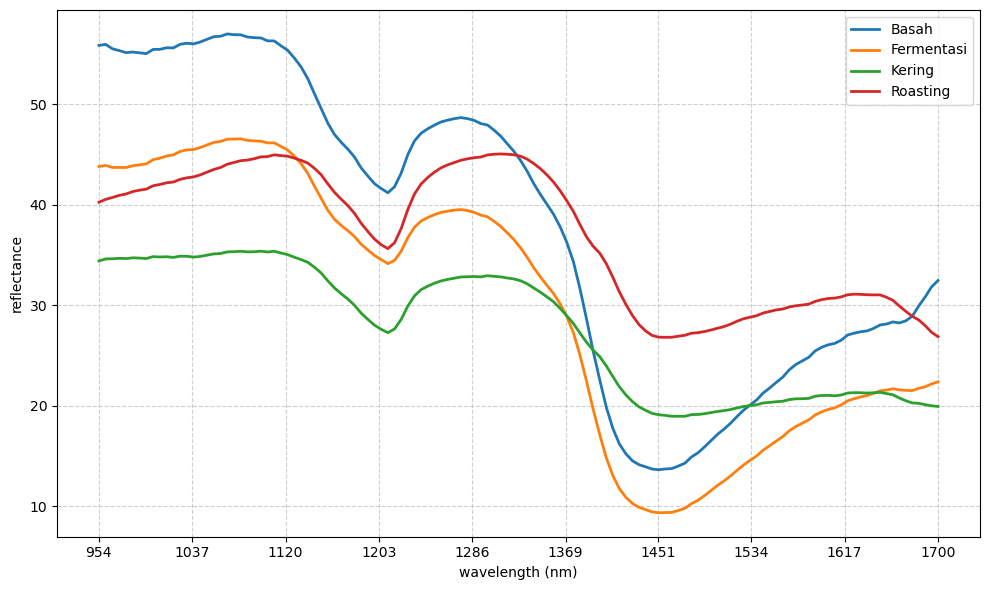

In [44]:
plot_avg_4df(df_basah, df_fermentasi, df_kering, df_roasting,['Basah', 'Fermentasi', 'Kering', 'Roasting'], num_xticks=10)